In [1]:
# Reviewed by Natalie Bivens 
# Comments: Implement error-tracking functionatlity 

using Pkg
Pkg.activate(".")
using Revise

  Activating project at `~/Workspace/CSC381/projects/dl_f22_project-3-hooded-seal`


In [2]:
includet("activations.jl")
includet("neural_net_training.jl")
includet("generate_data.jl")
includet("plot_models.jl")

### Testing classification models
#### 2D Data:

In [3]:
(classification_inputs_2d, classification_targets_2d) = generate_classification_data(200, 2; num_clusters=4, lb=-1, ub=1, var=.1, covar=0)
println("2D data created")

2D data created


In [4]:
nn_2Dclass = NeuralNetwork(2, 1, [20], [ReLU_activation, tanh_activation, sigmoid_activation])
println("2D Classifier created")

2D Classifier created


##### Pre-training plot:

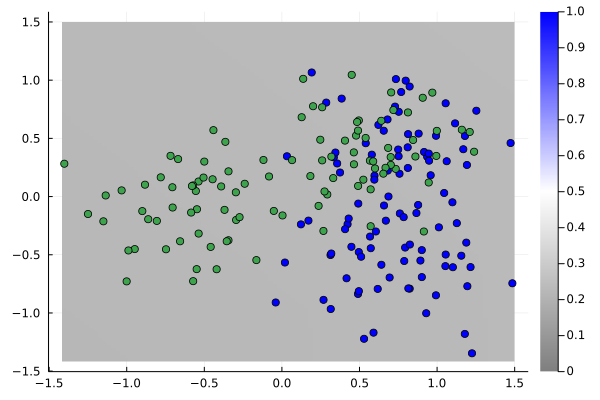

In [5]:
plot_classifier(nn_2Dclass, classification_inputs_2d, classification_targets_2d; resolution=100)

In [30]:
train!(nn_2Dclass, classification_inputs_2d, classification_targets_2d, 0.1, 1000)

##### Post-trainig plot:

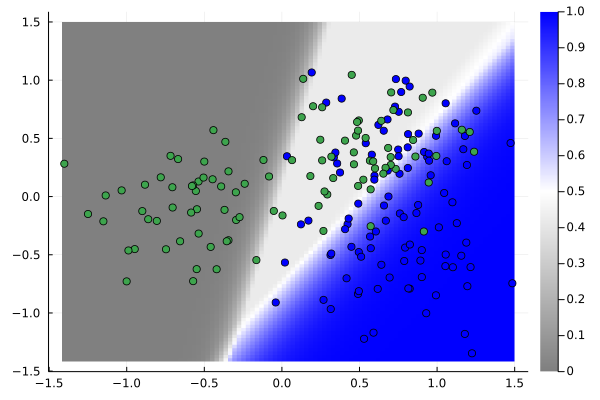

In [7]:
plot_classifier(nn_2Dclass, classification_inputs_2d, classification_targets_2d; resolution=100)

#### 3D data:

In [9]:
(classification_inputs_3d, classification_targets_3d) = generate_classification_data(200, 3; num_labels=1, num_clusters=4, lb=-1, ub=1, var=.1, covar=0)
println("3D data created")

3D data created


In [10]:
nn_3Dclass = NeuralNetwork(3, 1, [10, 10], [ReLU_activation, tanh_activation, sigmoid_activation])
println("3D Classifier created")

3D Classifier created


In [11]:
preds = predict(nn_3Dclass, classification_inputs_3d)
acc = accuracy(preds, classification_targets_3d')
println("Accuracy before training: ", acc)

train!(nn_3Dclass, classification_inputs_3d, classification_targets_3d, 0.1, 1000)

preds = predict(nn_3Dclass, classification_inputs_3d)
acc = accuracy(preds, classification_targets_3d')
println("Accuracy after training: ", acc)

Accuracy before training: 0.005
Accuracy after training: 1.0


### Testing regression models
#### 1D data:

In [12]:
(regression_inputs_1d, regression_targets_1d) = generate_regression_data(200, 1, 1)
println("1D regression data created")

1D regression data created


In [13]:
nn_reg = NeuralNetwork(1, 1, [3, 8], linear_activation)
println("1D regression model created")

1D regression model created


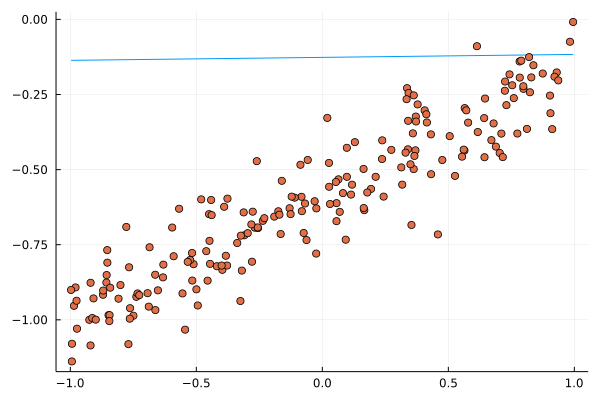

In [14]:
plot_regressor(nn_reg, regression_inputs_1d, regression_targets_1d)

In [15]:
train!(nn_reg, regression_inputs_1d, regression_targets_1d', 0.1, 1000)

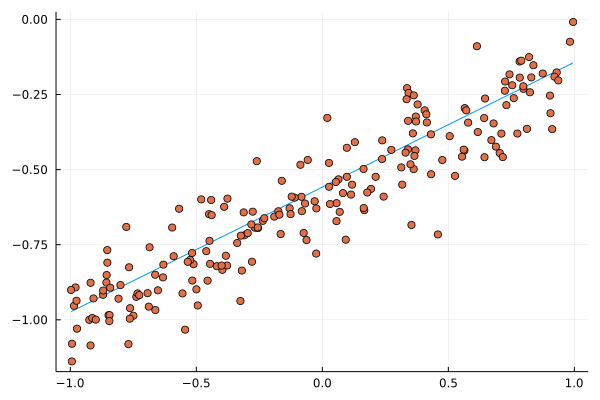

In [16]:
plot_regressor(nn_reg, regression_inputs_1d, regression_targets_1d)

#### 3D regression data:

In [4]:
(regression_inputs_3d, regression_targets_3d) = generate_regression_data(200, 3, 3)
println("3D regression data created")

3D regression data created


In [18]:
nn_reg3 = NeuralNetwork(3, 1, [3, 8], linear_activation)
println("3D regression model created")

3D regression model created


In [19]:
preds = predict(nn_reg3, regression_inputs_3d)
mse = MSE(preds, regression_targets_3d')
println("MSE before training: ", mse)

train!(nn_reg3, regression_inputs_3d, regression_targets_3d, 0.1, 1000)

preds = predict(nn_reg3, regression_inputs_3d)
mse = MSE(preds, regression_targets_3d')
println("MSE after training: ", mse)

MSE before training: 249.77134883981864
MSE after training: 3.1216995685897815


In [18]:
using Plots
nn_reg3 = NeuralNetwork(3, 1, [3, 8], linear_activation)
losses = train!(nn_reg3, regression_inputs_3d, regression_targets_3d, 0.1, 1000, 1, [])
println("Losses returned from train!")

Losses returned from train!


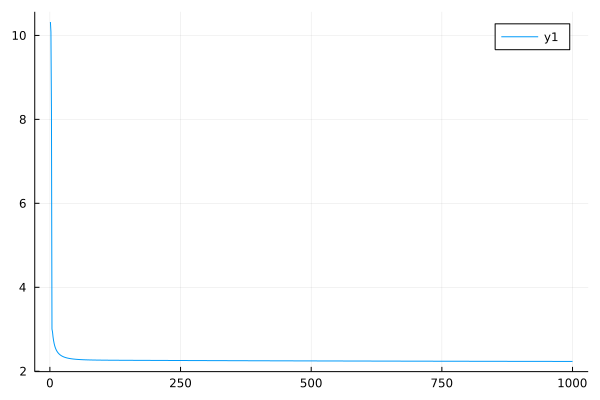

In [22]:
plot(1:size(losses, 1), losses)